# STEM simulations with the standard algorithm

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

from ase.build import mx2
from ase.io import read

from tensorwaves.waves import ProbeWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector

## Quick Simulation

In [2]:
atoms = read('../data/mos2.traj')

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


In [4]:
probe = ProbeWaves(energy=80e3, aperture_cutoff=.02, sampling=.1)

detector = RingDetector(inner=.05, outer=.2)

scan = probe.gridscan(potential=atoms,
                      max_batch=2000,
                      start=(0,0), 
                      end=(cell[0]/2, cell[1]/2), 
                      sampling=.3,
                      detectors=detector)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 1/1 


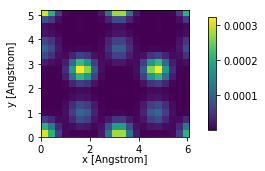

In [5]:
image = scan.image()
image.show()

## Step-by-step Simulation

### Set up unit cell

In [6]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=2, axis=2)

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  7.19      ]


### Create Potential

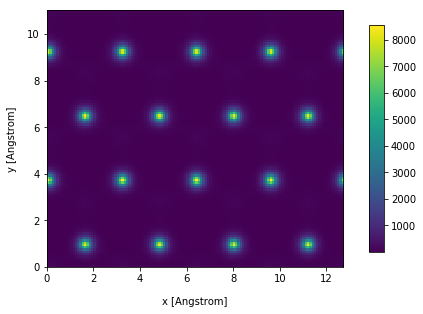

In [8]:
potential = Potential(atoms=atoms, parametrization='kirkland', num_slices=10, sampling=.1)

potential.current_slice = 3

potential.show(fig_scale=2)

### Create Probe

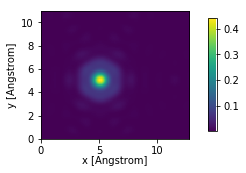

In [13]:
aberrations = {'C10':100}

probe = ProbeWaves(energy=80e3, aperture_cutoff=.02, gpts=potential.gpts, extent=potential.extent, **aberrations)
#probe.aberrations.parametrization.defocus = 10

probe.positions = (5,5)
probe.build().show()

### Create Detector

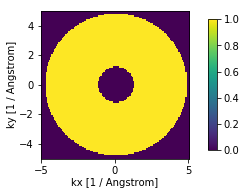

In [22]:
detector = RingDetector(inner=.05, outer=.2, gpts=probe.gpts, extent=probe.extent, energy=probe.energy)

detector.build().show(space='fourier')

### Perform Grid Scan 

In [23]:
start = (0,0)
end = (cell[0]/2, cell[1]/2)

scan = probe.gridscan(potential=potential, start=(0,0), end=end, sampling=.2, detectors=detector, max_batch=800)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 2/2 


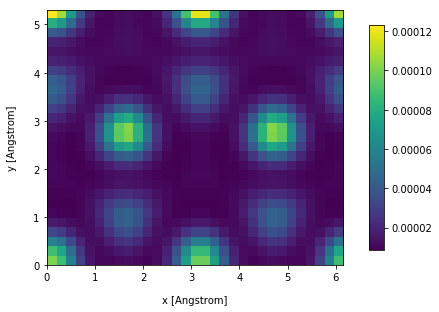

In [24]:
image = scan.image()
image.show(fig_scale=2)

In [25]:
image.numpy()

array([[[0.01004355, 0.00937603, 0.00771859, 0.00574386, 0.0041115 ,
         0.00317615, 0.00291043, 0.00303652, 0.0032413 , 0.00333499,
         0.00328993, 0.00319048, 0.00316478, 0.00334068, 0.00381486,
         0.00460431, 0.00558304, 0.00645923, 0.00686005, 0.00653095,
         0.0055541 , 0.00442704, 0.00388875, 0.00453401, 0.00642442,
         0.00895472, 0.0111026 ],
        [0.0093571 , 0.00871669, 0.00717884, 0.00537654, 0.00391702,
         0.00311007, 0.00290663, 0.00303496, 0.00320798, 0.00326618,
         0.00320076, 0.0030955 , 0.00306193, 0.00320749, 0.00361902,
         0.00432299, 0.00522079, 0.00605446, 0.00647492, 0.00622682,
         0.00536205, 0.0043267 , 0.003807  , 0.00436783, 0.00608077,
         0.00839131, 0.01035067],
        [0.00760419, 0.00705323, 0.00584812, 0.00451067, 0.00350446,
         0.00301996, 0.00295569, 0.00306536, 0.00314141, 0.00311186,
         0.00301854, 0.00293716, 0.00292347, 0.00301811, 0.00327264,
         0.00373609, 0.00438703, 0.